## 0. Code Library and Links

In [1]:
import numpy as np 
import pandas as pd 
import scipy

import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score

In [3]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

In [5]:
def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    regressor_list.append(str(regressor))
    
    ev_train_c = explained_variance_score(y_train, y_train_reg)
    ev_train.append(ev_train_c)
    ev_test_c = explained_variance_score(y_test, y_test_reg)
    ev_test.append(ev_test_c)
    
    r2_train_c = r2_score(y_train, y_train_reg)
    r2_train.append(r2_train_c)
    r2_test_c = r2_score(y_test, y_test_reg)
    r2_test.append(r2_test_c)
    
    mse_train_c = mean_squared_error(y_train, y_train_reg)
    mse_train.append(mse_train_c)
    mse_test_c = mean_squared_error(y_test, y_test_reg)
    mse_test.append(mse_test_c)

    mae_train_c = mean_absolute_error(y_train, y_train_reg)
    mae_train.append(mae_train_c)
    mae_test_c = mean_absolute_error(y_test, y_test_reg)
    mae_test.append(mae_test_c)  
    
    mdae_train_c = median_absolute_error(y_train, y_train_reg)
    mdae_train.append(mdae_train_c)
    mdae_test_c = median_absolute_error(y_test, y_test_reg)
    mdae_test.append(mdae_test_c)
    
    print("______________________________________________________________________________")
    print(str(regressor))
    print("______________________________________________________________________________")
    print("EV score. Train: ", ev_train_c)
    print("EV score. Test: ", ev_test_c)
    print("---------")
    print("R2 score. Train: ", r2_train_c)
    print("R2 score. Test: ", r2_test_c)
    print("---------")
    print("MSE score. Train: ", mse_train_c)
    print("MSE score. Test: ", mse_test_c)
    print("---------")
    print("MAE score. Train: ", mae_train_c)
    print("MAE score. Test: ", mae_test_c)
    print("---------")
    print("MdAE score. Train: ", mdae_train_c)
    print("MdAE score. Test: ", mdae_test_c)

## 1. Input Preprocessing

In [342]:
# Load data
train = pd.read_csv('house_train.csv')
test = pd.read_csv('house_test.csv')

In [343]:
len(train)

1460

In [344]:
train.head().T[:15]

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [345]:
# Count NaN values
train_nulllist = train.isnull().sum()[train.isnull().sum()!=0].index.values.tolist()
train_null_list = [x for x in train_nulllist if x!='Electrical']

In [346]:
# Delete columns with a lot of NaN
for element in train_null_list:
    del train[element]
    del test[element]

In [347]:
train.isnull().sum()[train.isnull().sum()!=0]

Electrical    1
dtype: int64

In [348]:
test.isnull().sum()[test.isnull().sum()!=0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [349]:
# Fill in NaN values
most_common = pd.get_dummies(train['Electrical']).sum().sort_values(ascending=False).index[0]
train['Electrical'] = train['Electrical'].fillna(most_common)

test_cat_null_list = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 
                      'KitchenQual', 'Functional', 'SaleType']
test_num_null_list = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                      'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

for x in test_cat_null_list:
    most_common = pd.get_dummies(test[x]).sum().sort_values(ascending=False).index[0]
    test[x] = test[x].fillna(most_common)

for y in test_num_null_list:
    test[y] = test[y].fillna(test[y].median())

In [350]:
# Factorize categorical features
train_object_list = train.dtypes[train.dtypes=='object'].index.values.tolist()
print(train_object_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [351]:
for element in train_object_list:
    train_categories = pd.factorize(train[element])
    test_categories = pd.factorize(test[element])
    train[element] = train_categories[0]
    test[element] = test_categories[0]

In [352]:
float_list = test.dtypes[test.dtypes == 'float64'].index.values.tolist()
print(float_list)
for element in float_list:
    test[element] = test[element].astype(int)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']


In [353]:
# Display correlation
pearson = train.corr(method='pearson')
corr_with_prices = pearson.iloc[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]][:26]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Fireplaces      0.466929
Foundation     -0.429678
HeatingQC      -0.427649
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotShape        0.267759
ExterQual      -0.265015
LotArea         0.263843
CentralAir     -0.251328
Electrical     -0.231417
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
PavedDrive     -0.208954
Name: SalePrice, dtype: float64

In [354]:
# Create feature list
features_list = corr_with_prices[abs(corr_with_prices).argsort()[::-1]][:26].index.values.tolist()

In [355]:
target_train = train['SalePrice'].as_matrix()
features_train = train[features_list].as_matrix()
features_test = test[features_list].as_matrix()

In [356]:
# Scale the data
scale = RobustScaler()

features_train = scale.fit_transform(features_train)
features_test = scale.transform(features_test)

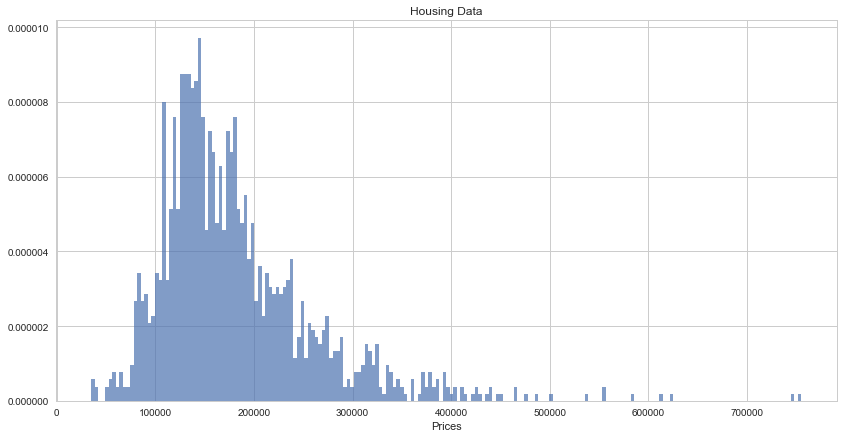

In [357]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14, 7))

plt.hist(target_train, bins=200, normed=True, alpha=0.7)

plt.xlabel("Prices")
plt.title('Housing Data');

In [358]:
X_train, X_test, y_train, y_test = train_test_split(features_train, target_train, 
                                                    test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((1168, 26), (292, 26))

## 2. Regressors

In [359]:
regressor_list = []
ev_train = []
ev_test = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
mae_train = []
mae_test = []
mdae_train = []
mdae_test = []

### Adaptive Boosting and Random Forest Regressors

In [360]:
y_train_abr, y_test_abr = regression(AdaBoostRegressor(), 
                                     X_train, X_test, y_train)

y_train_rfr, y_test_rfr = regression(RandomForestRegressor(), 
                                     X_train, X_test, y_train)

In [361]:
scores(AdaBoostRegressor(), y_train, y_test, y_train_abr, y_test_abr)
scores(RandomForestRegressor(), y_train, y_test, y_train_rfr, y_test_rfr)

______________________________________________________________________________
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
______________________________________________________________________________
EV score. Train:  0.874614117897
EV score. Test:  0.883580357107
---------
R2 score. Train:  0.866162289851
R2 score. Test:  0.875994352783
---------
MSE score. Train:  815368261.533
MSE score. Test:  884401254.323
---------
MAE score. Train:  21971.8576151
MAE score. Test:  22165.2498956
---------
MdAE score. Train:  17491.8065333
MdAE score. Test:  17406.4526105
______________________________________________________________________________
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=

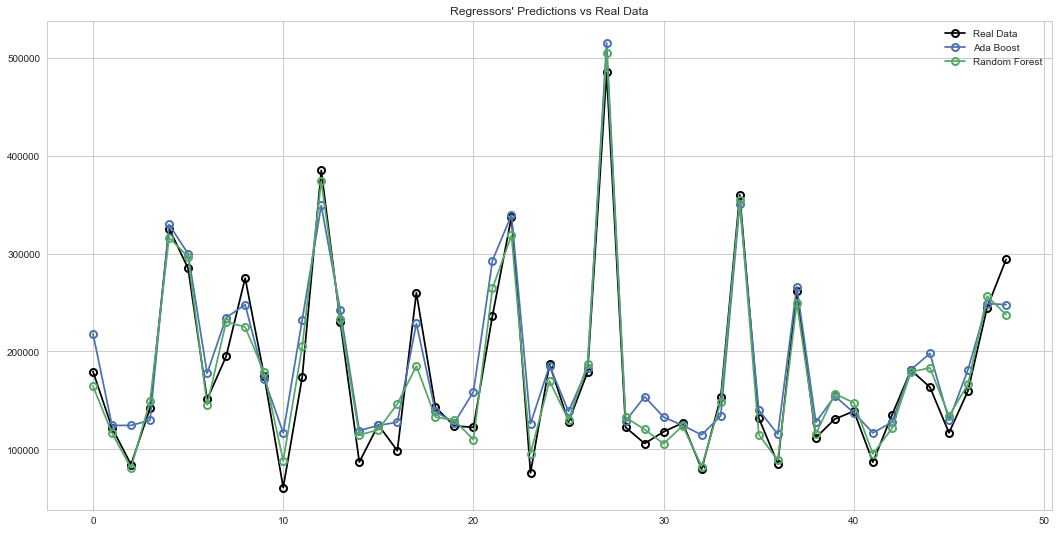

In [362]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_abr[1:50], '-o', label='Ada Boost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(y_test_rfr[1:50], '-o', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Regressors' Predictions vs Real Data");

### Gradient Boosting and Bagging Regressors

In [363]:
y_train_gbr, y_test_gbr = regression(GradientBoostingRegressor(), 
                                                      X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(), X_train, X_test, y_train)

In [364]:
scores(GradientBoostingRegressor(), y_train, y_test, y_train_gbr, y_test_gbr)
scores(BaggingRegressor(), y_train, y_test, y_train_br, y_test_br)

______________________________________________________________________________
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
______________________________________________________________________________
EV score. Train:  0.955231977777
EV score. Test:  0.919748348325
---------
R2 score. Train:  0.955231977777
R2 score. Test:  0.919428749297
---------
MSE score. Train:  272736468.754
MSE score. Test:  574629597.787
---------
MAE score. Train:  11975.5475258
MAE score. Test:  16325.4229982
---------
MdAE score. Train:  8955.24443044
MdAE score. Test:  10927.4498691
______________________________________________

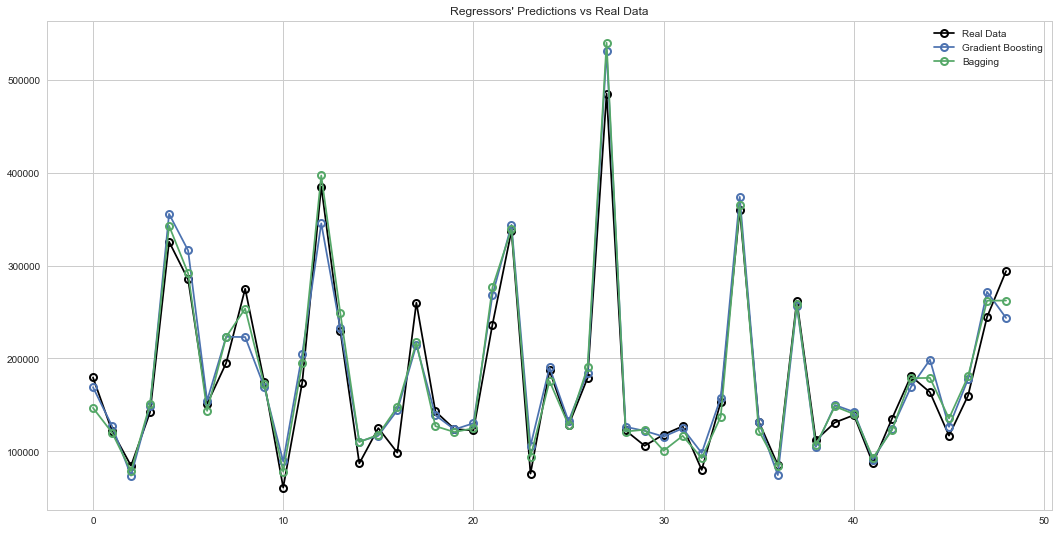

In [365]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_gbr[1:50], '-o', label='Gradient Boosting',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(y_test_br[1:50], '-o', label='Bagging',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Regressors' Predictions vs Real Data");

### Decision Tree and Extra Trees Regressors

In [366]:
y_train_dtr, y_test_dtr = regression(DecisionTreeRegressor(), 
                                     X_train, X_test, y_train)

y_train_etr, y_test_etr = regression( ExtraTreesRegressor(), 
                                   X_train, X_test, y_train)

In [367]:
scores(DecisionTreeRegressor(), y_train, y_test, y_train_dtr, y_test_dtr)
scores(ExtraTreesRegressor(), y_train, y_test, y_train_etr, y_test_etr)

______________________________________________________________________________
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
______________________________________________________________________________
EV score. Train:  0.999991206779
EV score. Test:  0.824801876835
---------
R2 score. Train:  0.999991206779
R2 score. Test:  0.824652787038
---------
MSE score. Train:  53570.2054795
MSE score. Test:  1250566394.08
---------
MAE score. Train:  13.5273972603
MAE score. Test:  24516.130137
---------
MdAE score. Train:  0.0
MdAE score. Test:  17463.0
______________________________________________________________________________
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
    

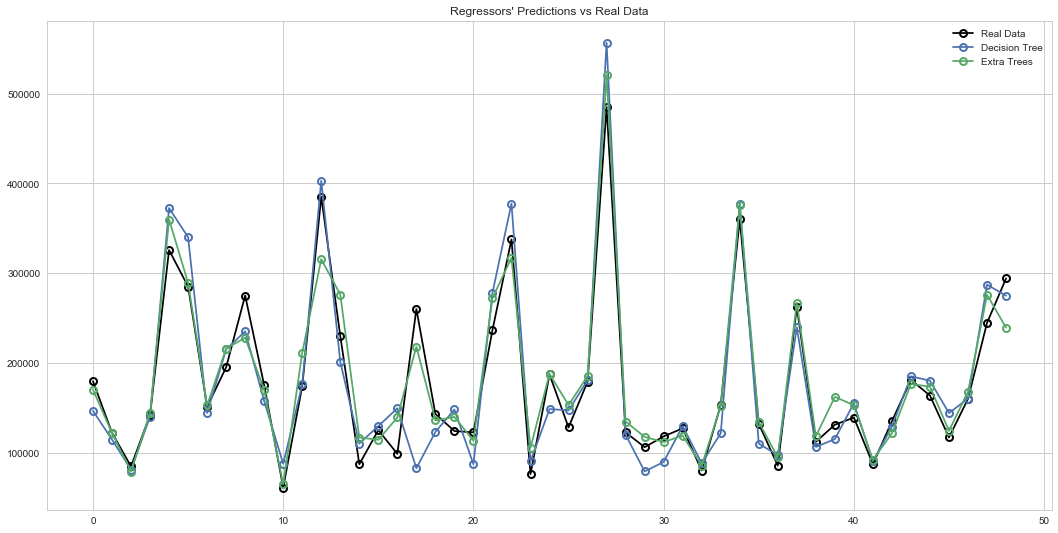

In [368]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], '-o', color = 'black', label='Real Data',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_dtr[1:50], '-o', label='Decision Tree',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(y_test_etr[1:50], '-o', label='Extra Trees',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Regressors' Predictions vs Real Data");

### K Neighbors and Radius Neighbors Regressors

In [369]:
y_train_knr, y_test_knr = regression(KNeighborsRegressor(n_neighbors=3), 
                                     X_train, X_test, y_train)

y_train_rnr, y_test_rnr = regression(RadiusNeighborsRegressor(radius=5.57), 
                                     X_train, X_test, y_train)

In [370]:
scores(KNeighborsRegressor(n_neighbors=2), y_train, y_test, y_train_knr, y_test_knr)
scores(RadiusNeighborsRegressor(radius=5.57), y_train, y_test, y_train_rnr, y_test_rnr)

______________________________________________________________________________
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')
______________________________________________________________________________
EV score. Train:  0.893837643961
EV score. Test:  0.870132135809
---------
R2 score. Train:  0.893542976255
R2 score. Test:  0.870004535888
---------
MSE score. Train:  648559201.154
MSE score. Test:  927120289.253
---------
MAE score. Train:  15648.8955479
MAE score. Test:  19165.0605023
---------
MdAE score. Train:  10158.3333333
MdAE score. Test:  13544.0
______________________________________________________________________________
RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, p=2, radius=5.57, weights='uniform')
______________________________________________________________________________
EV score. Train

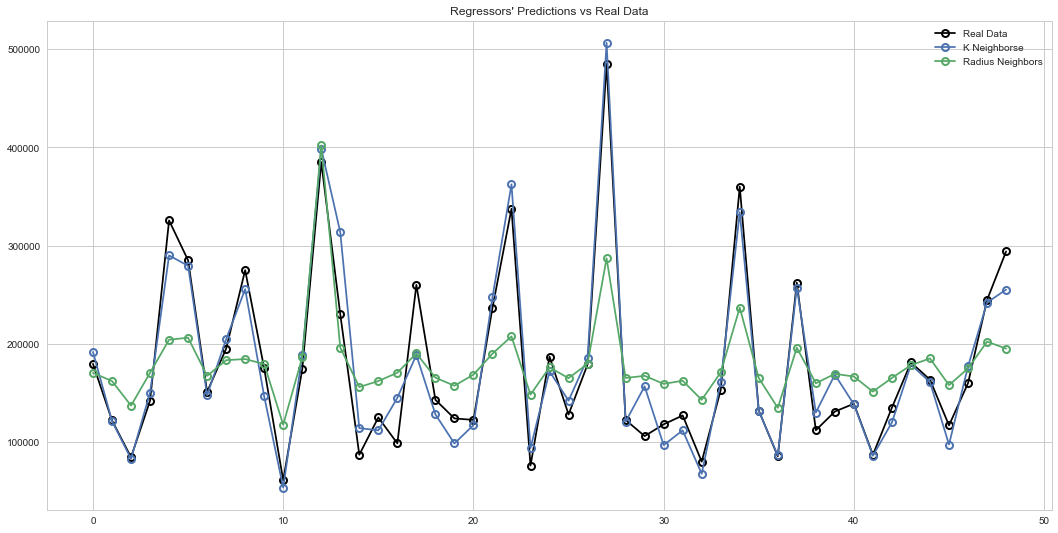

In [371]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], '-o', color = 'black', label='Real Data',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_knr[1:50], '-o', label='K Neighborse',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(y_test_rnr[1:50], '-o', label='Radius Neighbors',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Regressors' Predictions vs Real Data");

### Huber and SGD Regressors

In [ ]:
y_train_hr, y_test_hr = regression(HuberRegressor(), 
                                     X_train, X_test, y_train)

y_train_sgdr, y_test_sgdr = regression(SGDRegressor(), 
                                     X_train, X_test, y_train)

In [ ]:
scores(HuberRegressor(), y_train, y_test, y_train_hr, y_test_hr)
scores(SGDRegressor(), y_train, y_test, y_train_sgdr, y_test_sgdr)

In [ ]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], '*', color = 'black', label='Real Data',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_hr[1:50], '-o', label='Huber',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(y_test_sgdr[1:50], '-o', label='SGD',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Regressors' Predictions vs Real Data");

## 3. Evaluation Metrics

In [372]:
df_results = pd.DataFrame({'regressor' : regressor_list,
                           'ev_train': ev_train,
                           'ev_test': ev_test,
                           'r2_train': r2_train,
                           'r2_test': r2_test,
                           'mse_train': mse_train,
                           'mse_test': mse_test,
                           'mae_train': mae_train,
                           'mae_test': mae_test,
                           'mdae_train': mdae_train,
                           'mdae_test': mdae_test})

In [373]:
df_results['regressor'][3]

'BaggingRegressor(base_estimator=None, bootstrap=True,\n         bootstrap_features=False, max_features=1.0, max_samples=1.0,\n         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,\n         verbose=0, warm_start=False)'

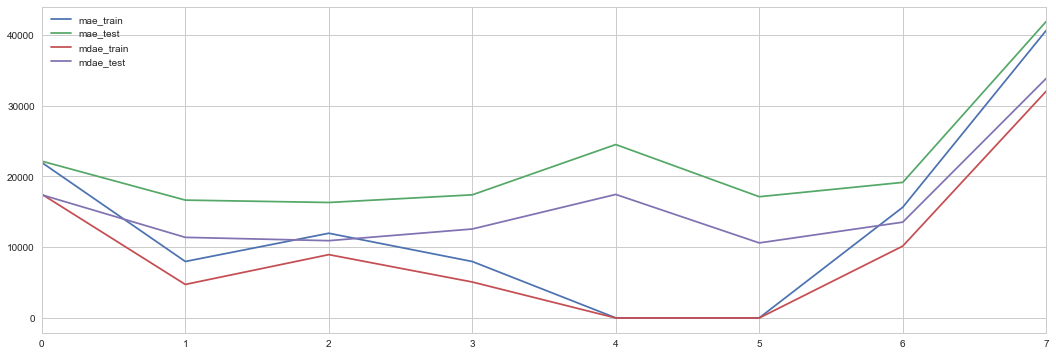

In [374]:
df_results[['mae_train', 'mae_test', 'mdae_train', 'mdae_test']].plot(figsize = (18, 6));

## 4. Tuning Algorithms

### Gradient Boosting Regressor

In [375]:
param_grid_gbr = {'learning_rate': [0.1, 0.05], 'max_depth': [4, 5, 6], 
                  'min_samples_leaf': [1, 2], 'min_samples_split': [2, 3],
                  'n_estimators': range(52, 260, 26)}

gridsearch_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, n_jobs=5).fit(X_train, y_train)

In [376]:
gridsearch_gbr.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 156}

In [377]:
regressor_gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, 
                                          n_estimators=182, 
                                          min_samples_leaf=1, min_samples_split=2)

y_train_gbr_best, y_test_gbr_best = regression(regressor_gbr, X_train, X_test, y_train)

scores(regressor_gbr, y_train, y_test, y_train_gbr_best, y_test_gbr_best)

______________________________________________________________________________
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=182,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
______________________________________________________________________________
EV score. Train:  0.973699521555
EV score. Test:  0.929033263702
---------
R2 score. Train:  0.973699521555
R2 score. Test:  0.928765310367
---------
MSE score. Train:  160228199.982
MSE score. Test:  508041772.908
---------
MAE score. Train:  9432.88523031
MAE score. Test:  15469.1605717
---------
MdAE score. Train:  7090.27828165
MdAE score. Test:  10379.0551942


### Bagging Regressor

In [412]:
param_grid_br = {'base_estimator': [DecisionTreeRegressor(), RandomForestRegressor(),
                                    GradientBoostingRegressor()],
                 'n_estimators': range(26, 183, 26)}

gridsearch_br = GridSearchCV(BaggingRegressor(), param_grid_br, n_jobs=5).fit(X_train, y_train)

In [413]:
gridsearch_br.best_params_

{'base_estimator': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False), 'n_estimators': 26}

In [414]:
regressor_br = BaggingRegressor(GradientBoostingRegressor(), n_estimators=208)

y_train_br_best, y_test_br_best = regression(regressor_br, X_train, X_test, y_train)

scores(regressor_br, y_train, y_test, y_train_br_best, y_test_br_best)

______________________________________________________________________________
BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=208, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
______________________________________________________________________________
EV score. Train:  0.940740833515
EV score. Test:  0.921929578382
---------
R2 score. Train:  0.940738374718
R2 score. Test:  0.921920926548
---------
MSE score. Train:  361034631.626


### Random Forest Regressor

In [396]:
param_grid_rfr = {'n_estimators': range(26, 261, 26)}

gridsearch_rfr = GridSearchCV(RandomForestRegressor(), param_grid_rfr, n_jobs=5).fit(X_train, y_train)

In [397]:
gridsearch_rfr.best_params_

{'n_estimators': 156}

In [400]:
regressor_rfr = RandomForestRegressor(n_estimators=156)

y_train_rfr_best, y_test_rfr_best = regression(regressor_rfr, X_train, X_test, y_train)

scores(regressor_rfr, y_train, y_test, y_train_rfr_best, y_test_rfr_best)

______________________________________________________________________________
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=156, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
______________________________________________________________________________
EV score. Train:  0.976487232039
EV score. Test:  0.912457852064
---------
R2 score. Train:  0.976486780811
R2 score. Test:  0.912449199713
---------
MSE score. Train:  143247614.084
MSE score. Test:  624407350.218
---------
MAE score. Train:  6873.02199919
MAE score. Test:  16667.290729
---------
MdAE score. Train:  4209.08012821
MdAE score. Test:  10996.1314103


### Extra Trees Regressor

In [394]:
param_grid_etr = {'n_estimators': range(26, 261, 26)}

gridsearch_etr = GridSearchCV(ExtraTreesRegressor(), param_grid_etr, n_jobs=10).fit(X_train, y_train)

In [395]:
gridsearch_etr.best_params_

{'n_estimators': 156}

In [399]:
regressor_etr = ExtraTreesRegressor(n_estimators=156)

y_train_etr_best, y_test_etr_best = regression(regressor_etr, X_train, X_test, y_train)

scores(regressor_etr, y_train, y_test, y_train_etr_best, y_test_etr_best)

______________________________________________________________________________
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=156, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)
______________________________________________________________________________
EV score. Train:  0.999991206779
EV score. Test:  0.91150027097
---------
R2 score. Train:  0.999991206779
R2 score. Test:  0.91144611067
---------
MSE score. Train:  53570.2054795
MSE score. Test:  631561324.476
---------
MAE score. Train:  13.5273972603
MAE score. Test:  15981.5821479
---------
MdAE score. Train:  0.0
MdAE score. Test:  10194.2660256


## 5. Simple Predictions

In [303]:
reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=182, 
                                min_samples_leaf=1, min_samples_split=2)
reg.fit(features_train, target_train)

target_train_predict = reg.predict(features_train)
target_test_predict = reg.predict(features_test)

In [304]:
print("_______________________________________")
print("Gradient Boosting  Regressor")
print("_______________________________________")
print("EV score. Train: ", explained_variance_score(target_train, target_train_predict))
print("---------")
print("R2 score. Train: ", r2_score(target_train, target_train_predict))
print("---------")
print("MSE score. Train: ", mean_squared_error(target_train, target_train_predict))
print("---------")
print("MAE score. Train: ", mean_absolute_error(target_train, target_train_predict))
print("---------")
print("MdAE score. Train: ", median_absolute_error(target_train, target_train_predict))

_______________________________________
Gradient Boosting  Regressor
_______________________________________
EV score. Train:  0.971765829881
---------
R2 score. Train:  0.971765829881
---------
MSE score. Train:  178066941.824
---------
MAE score. Train:  9921.02747801
---------
MdAE score. Train:  7424.83403686


In [305]:
target_predict = ["{0:.2f}".format(x) for x in target_test_predict]

submission = pd.DataFrame({"Id": test['Id'], "SalePrice": target_predict})
print(submission[0:20])

submission.to_csv('kaggle_housing.csv', index=False)

      Id  SalePrice
0   1461  128989.49
1   1462  155758.20
2   1463  185106.60
3   1464  187800.16
4   1465  187495.68
5   1466  177394.17
6   1467  174630.95
7   1468  169369.75
8   1469  187115.29
9   1470  127268.20
10  1471  198836.25
11  1472   99927.85
12  1473   97274.86
13  1474  157593.66
14  1475  135403.92
15  1476  370715.16
16  1477  252019.84
17  1478  304452.20
18  1479  259849.58
19  1480  477790.81


In [310]:
reg1 = BaggingRegressor(GradientBoostingRegressor(), n_estimators=182)

reg1.fit(features_train, target_train)

target_train_predict1 = reg1.predict(features_train)
target_test_predict1 = reg1.predict(features_test)

In [311]:
print("_______________________________________")
print("Bagging  Regressor")
print("_______________________________________")
print("EV score. Train: ", explained_variance_score(target_train, target_train_predict1))
print("---------")
print("R2 score. Train: ", r2_score(target_train, target_train_predict1))
print("---------")
print("MSE score. Train: ", mean_squared_error(target_train, target_train_predict1))
print("---------")
print("MAE score. Train: ", mean_absolute_error(target_train, target_train_predict1))
print("---------")
print("MdAE score. Train: ", median_absolute_error(target_train, target_train_predict1))

_______________________________________
Bagging  Regressor
_______________________________________
EV score. Train:  0.946211496039
---------
R2 score. Train:  0.946207578745
---------
MSE score. Train:  339257428.35
---------
MAE score. Train:  12770.7973776
---------
MdAE score. Train:  8858.8349205


In [312]:
target_predict1 = ["{0:.2f}".format(x) for x in target_test_predict1]

submission1 = pd.DataFrame({"Id": test['Id'], "SalePrice": target_predict1})
print(submission1[0:20])

submission1.to_csv('kaggle_housing1.csv', index=False)

      Id  SalePrice
0   1461  127248.13
1   1462  161081.26
2   1463  183178.17
3   1464  183375.43
4   1465  200186.96
5   1466  179805.29
6   1467  173468.41
7   1468  166490.30
8   1469  183746.07
9   1470  127259.96
10  1471  203698.14
11  1472  100868.82
12  1473   97538.56
13  1474  153403.16
14  1475  131420.31
15  1476  389843.71
16  1477  261745.96
17  1478  292091.90
18  1479  270382.46
19  1480  469007.37


In [401]:
reg2 = RandomForestRegressor(n_estimators=156)

reg2.fit(features_train, target_train)

target_train_predict2 = reg2.predict(features_train)
target_test_predict2 = reg2.predict(features_test)

In [402]:
print("_______________________________________")
print("Random Forest  Regressor")
print("_______________________________________")
print("EV score. Train: ", explained_variance_score(target_train, target_train_predict2))
print("---------")
print("R2 score. Train: ", r2_score(target_train, target_train_predict2))
print("---------")
print("MSE score. Train: ", mean_squared_error(target_train, target_train_predict2))
print("---------")
print("MAE score. Train: ", mean_absolute_error(target_train, target_train_predict2))
print("---------")
print("MdAE score. Train: ", median_absolute_error(target_train, target_train_predict2))

_______________________________________
Random Forest  Regressor
_______________________________________
EV score. Train:  0.980516960527
---------
R2 score. Train:  0.980515733215
---------
MSE score. Train:  122883151.352
---------
MAE score. Train:  6616.47092993
---------
MdAE score. Train:  4071.24038462


In [403]:
target_predict2 = ["{0:.2f}".format(x) for x in target_test_predict2]

submission2 = pd.DataFrame({"Id": test['Id'], "SalePrice": target_predict2})
print(submission2[0:20])

submission2.to_csv('kaggle_housing2.csv', index=False)

      Id  SalePrice
0   1461  129769.55
1   1462  154980.64
2   1463  182528.54
3   1464  184279.69
4   1465  197462.33
5   1466  183384.55
6   1467  175183.86
7   1468  174847.72
8   1469  181284.92
9   1470  118523.66
10  1471  195022.16
11  1472   99567.15
12  1473   99370.67
13  1474  156735.10
14  1475  131265.12
15  1476  382918.31
16  1477  256333.47
17  1478  301472.52
18  1479  232906.35
19  1480  456907.40


In [404]:
reg3 = ExtraTreesRegressor(n_estimators=156)

reg3.fit(features_train, target_train)

target_train_predict3 = reg3.predict(features_train)
target_test_predict3 = reg3.predict(features_test)

In [405]:
print("_______________________________________")
print("Extra Trees Regressor")
print("_______________________________________")
print("EV score. Train: ", explained_variance_score(target_train, target_train_predict3))
print("---------")
print("R2 score. Train: ", r2_score(target_train, target_train_predict3))
print("---------")
print("MSE score. Train: ", mean_squared_error(target_train, target_train_predict3))
print("---------")
print("MAE score. Train: ", mean_absolute_error(target_train, target_train_predict3))
print("---------")
print("MdAE score. Train: ", median_absolute_error(target_train, target_train_predict3))

_______________________________________
Extra Trees Regressor
_______________________________________
EV score. Train:  0.999993204756
---------
R2 score. Train:  0.999993204756
---------
MSE score. Train:  42856.1643836
---------
MAE score. Train:  10.8219178082
---------
MdAE score. Train:  0.0


In [406]:
target_predict3 = ["{0:.2f}".format(x) for x in target_test_predict3]

submission3 = pd.DataFrame({"Id": test['Id'], "SalePrice": target_predict3})
print(submission3[0:20])

submission3.to_csv('kaggle_housing3.csv', index=False)

      Id  SalePrice
0   1461  128289.74
1   1462  157599.62
2   1463  182348.69
3   1464  183366.36
4   1465  196531.38
5   1466  179006.29
6   1467  177881.87
7   1468  167660.70
8   1469  186497.67
9   1470  124790.44
10  1471  185627.00
11  1472  109280.15
12  1473  108632.05
13  1474  164925.42
14  1475  130836.83
15  1476  405775.98
16  1477  250711.21
17  1478  300307.43
18  1479  241293.36
19  1480  465957.47


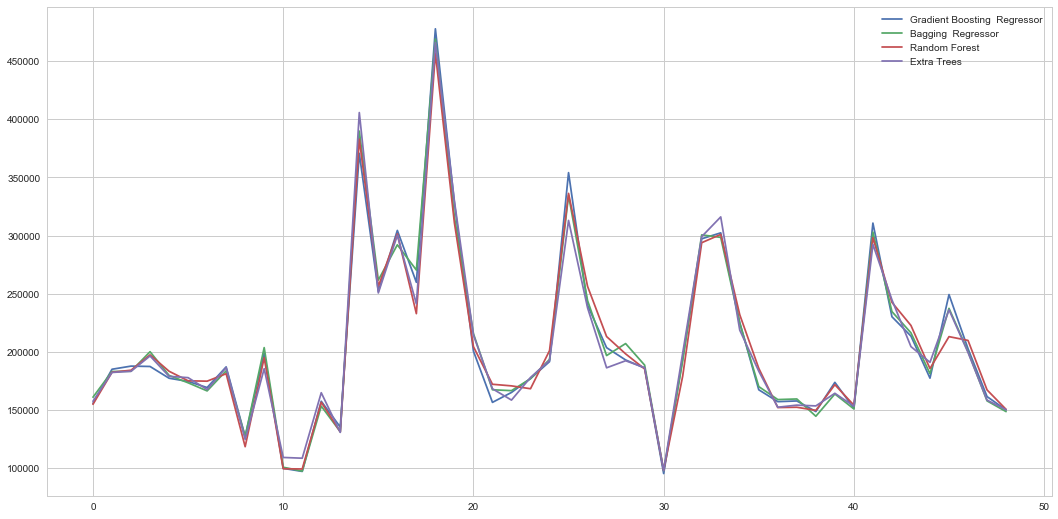

In [407]:
plt.figure(figsize = (18, 9))

plt.plot(target_test_predict[1:50], label='Gradient Boosting  Regressor')
plt.plot(target_test_predict1[1:50], label='Bagging  Regressor')
plt.plot(target_test_predict2[1:50], label='Random Forest')
plt.plot(target_test_predict3[1:50], label='Extra Trees')

plt.legend();

##  6. Features' importance

In [408]:
df_importance = pd.DataFrame(columns=range(26))

df_importance.loc[0] = AdaBoostRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[1] = RandomForestRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[2] = GradientBoostingRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[3]= DecisionTreeRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[4] = ExtraTreesRegressor().fit(X_train, y_train).feature_importances_

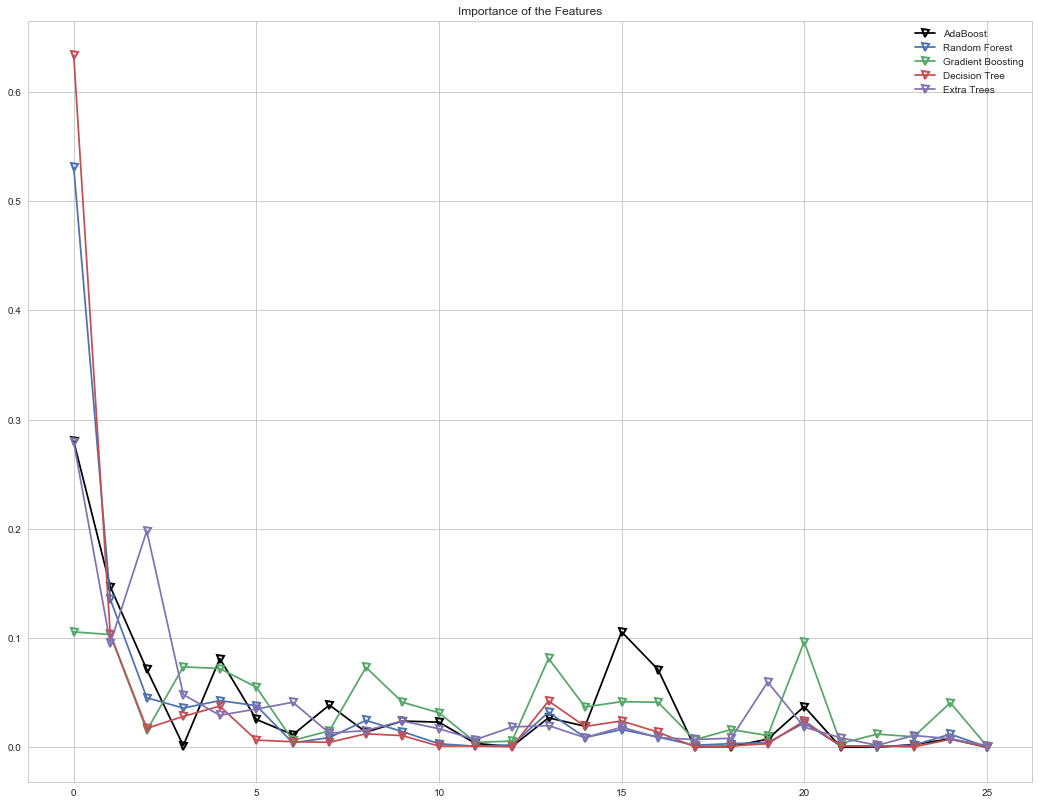

In [409]:
plt.figure(figsize = (18, 14))

plt.plot(df_importance.loc[0], '-v', color = 'black', label='AdaBoost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[1], '-v', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[2], '-v', label='Gradient Boosting',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[3], '-v', label='Decision Tree',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[4], '-v', label='Extra Trees',
        markersize=7, markerfacecolor="None", markeredgewidth=2)


plt.legend()
plt.title("Importance of the Features");

In [410]:
column_pairs = dict(zip(list(range(26)), list(features_list)))
index_pairs = dict(zip(list(range(5)), 
                       list(['AdaBoost', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'Extra Trees'])))
df_importance2 = df_importance.rename(index=index_pairs, columns=column_pairs)
df_importance2.T

,AdaBoost,Random Forest,Gradient Boosting,Decision Tree,Extra Trees
OverallQual,0.280189,0.531093,0.105607,0.633672,0.279211
GrLivArea,0.147118,0.135599,0.103202,0.103418,0.095232
GarageCars,0.071181,0.045307,0.015332,0.017248,0.198177
GarageArea,0.001471,0.035846,0.073575,0.028224,0.048166
TotalBsmtSF,0.081138,0.042694,0.072079,0.037602,0.029256
1stFlrSF,0.025429,0.038038,0.054945,0.006492,0.034973
FullBath,0.011453,0.003979,0.006201,0.004983,0.041132
TotRmsAbvGrd,0.038616,0.008836,0.015011,0.004504,0.012856
YearBuilt,0.013815,0.024554,0.073177,0.012270,0.015261
YearRemodAdd,0.023952,0.014269,0.041193,0.010614,0.023990


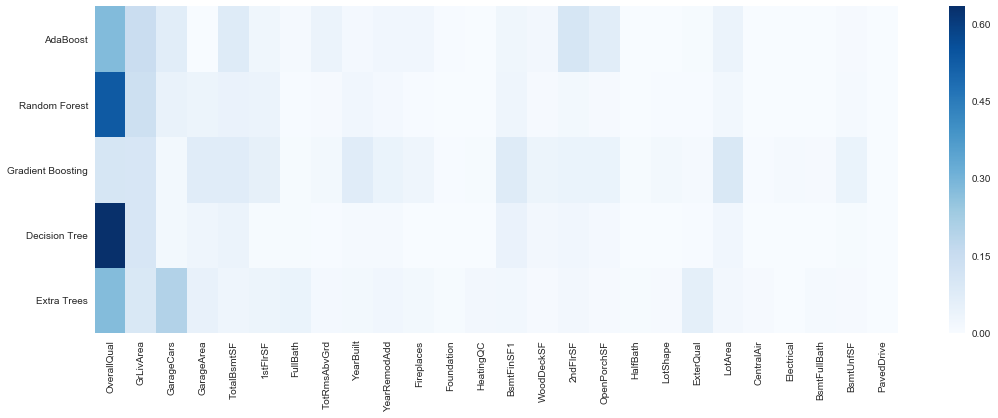

In [411]:
plt.figure(figsize = (18, 6))
sns.heatmap(df_importance2, cmap='Blues');

## 7. Regressor ensembles